# Proyecto: Predicción de Precio Máximo BTC luego del Halving 2024

### Alumno: Martin Adrian Ferraguti


## 1) Introducción: Evento Halving<br>
El halving de Bitcoin es un evento que ocurre cada 210,000 bloques, lo que equivale a aproximadamente cada 4 años.<br>
Durante el halving, la recompensa por minar un bloque de Bitcoin se reduce a la mitad.<br>
Este evento tiene un impacto importante en la oferta de Bitcoin, ya que reduce la cantidad de nuevos bitcoins que se crean cada año.<br>
Algunos analistas creen que el halving puede tener un impacto positivo en el precio de Bitcoin, ya que reduce la inflación y aumenta la escasez.<br>

Fechas de Halving:<br>
- Fechas pasadas:<br>
    - Primer evento halving: 28 de noviembre de 2012: La recompensa por bloque se redujo de 50 BTC a 25 BTC.<br>
    - Segundo evento halving: 9 de julio de 2016: La recompensa por bloque se redujo de 25 BTC a 12.5 BTC.<br>
    - Tercer evento halving: 11 de mayo de 2020: La recompensa por bloque se redujo de 12.5 BTC a 6.25 BTC.<br>
- Fechas futuras:<br>
    - Cuarto evento halving: Abril de 2024, la recompensa por bloque se reducirá de 6.25 BTC a 3.125 BTC.<br>
    - Quinto evento halving: Marzo de 2028, la recompensa por bloque se reducirá de 3.125 BTC a 1.5625 BTC.<br>
    - Sexto evento halving: Febrero de 2032, la recompensa por bloque se reducirá de 1.5625 BTC a 0.78125 BTC.<br>
Nota: La fecha exacta del halving puede variar ligeramente debido a la naturaleza dinámica del tiempo de bloque de Bitcoin.<br>

## 2) Objetivo
El presente proyecto de Data Science pretende predecir el momento y la cotización máxima a la cual podría alcanzar este activo luego del evento halving de Abril de este año<br>
</p>


## 3) Datasets utilizados:<br>
Archivo adjunto al proyecto.
</p>

### Comencemos

In [1]:
# Importamos todas las librerías que vamos a utilizar en el proyecto
import pandas as pd
import numpy
from matplotlib import pyplot as plt
import seaborn as sb

from datetime import datetime


C:\Users\marti\AppData\Local\Temp\ipykernel_14720\1643523955.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Cargamos el dataframe
file_name = 'BTC-USD.csv'
df = pd.read_csv(file_name)

# Seteamos el índice de mi dataframe para que comience en 1
df.set_index(pd.Index(range(1, len(df) + 1)), inplace=True)

### 1- Data Analysis

#### Comencemos con el Análisis exploratorio de datos (EDA)

<p>
Conociendo cómo esta compuesto el dataframe:

1.1 ¿Cuál es la cantidad de filas y columnas que lo componen? /.shape<br>

1.2 ¿Cuáles son las columnas o atributos que lo componen? /.columns<br>

1.3 ¿Cuáles son los tipos de datos de cada columna? /.dtypes ¿se detectan inconsistencias?<br>

1.4 Veamos una pequeña muestra del dataframe: Exploremos las primeras y últimas filas /.head(), /.tail()<br>

1.5 Analizando datos estadísticos básicos del dataframe: /.describe()<br>

1.6 ¿Son necesarias transformaciones?<br>
---> 1.6.1 ¿Es necesario cambiar el tipo de dato de alguna columna?<br>
---> 1.6.2 ¿Hay valores nulos? Definamos una estrategia para solucionarlo.<br>
---> 1.6.3 ¿Hay períodos faltantes?<br>

1.7 Seleccionamos determinadas columnas para explorar la relación entre ellas a lo largo del tiempo<br>
---> 1.7.1 Análisis univariado<br>
---> 1.7.2 Análisis bi/multivariado<br>

1.8 Respondiendo preguntas con datos:<br>
---> 1.8.1 ¿Cuál es el volumen operado por año?<br>
---> 1.8.2 ¿Cómo varia dicho volumne antes y despues de la fecha de halving? 90 días antes y después<br>
---> 1.8.3 ¿Cómo evoluciona la cotización máxima entre cada evento halving?  90 días antes y después<br>
---> 1.8.4 ¿Cuántos días pasaron entre cada evento halving y la cotización máximo del período?<br>
---> 1.9.5 ¿Qué porcentaje de variación hubo entre los valores maximos correspondientes a cada periodo halving?<br>
</p>

-----------------------------------------------------------------------

In [3]:
# 1.1 ¿Cuál es la cantidad de filas y columnas que lo componen? /.shape
filas, columnas = df.shape
print(f"Total de Filas = {filas}")
print(f"Total de Columnas = {columnas}")

Total de Filas = 3427
Total de Columnas = 7


In [4]:
# 1.2 ¿Cuáles son las columnas o atributos que lo componen? /.columns
print(f"Columnas que componen el dataframe:")
print(f"{df.columns}")

Columnas que componen el dataframe:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [5]:
# 1.3 ¿Cuáles son los tipos de datos de cada columna? /.dtypes, ¿se detectan inconsistencias?
print(f"Tipo de Dato por Columna:")
df.dtypes

Tipo de Dato por Columna:


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

⚠️ La columna/atributo "Date" es de tipo object, deberemos convertirla a un formato date/datetime

In [6]:
# 1.4 Veamos una pequeña muestra del dataframe: Exploremos las primeras y últimas filas /.head(), /.tail()
print("Esta es una muestra de los datos contenidos en el dataframe:")
print("PRIMEROS 5 REGISTROS")
print("====================")
df.head()   # Veamos los primeros 5 registros

Esta es una muestra de los datos contenidos en el dataframe:
PRIMEROS 5 REGISTROS


,Date,Open,High,Low,Close,Adj Close,Volume
1,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
3,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
4,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
5,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [14]:
print("ÚLTIMOS 5 REGISTROS")
print("===================")
df.tail()   # Veamos los últimos 5 registros

ÚLTIMOS 5 REGISTROS


,Date,Open,High,Low,Close,Adj Close,Volume
3422,2024-01-29,42030.914063,43305.867188,41818.332031,43288.246094,43288.246094,2.066848e+10
3423,2024-01-30,43300.226563,43838.945313,42711.371094,42952.609375,42952.609375,2.384281e+10
3424,2024-01-31,42946.250000,43717.406250,42298.945313,42582.605469,42582.605469,2.467363e+10
3425,2024-02-01,42569.761719,43243.167969,41879.191406,43075.773438,43075.773438,2.142395e+10
3426,2024-02-02,43077.640625,43422.488281,42584.335938,43185.859375,43185.859375,1.860384e+10


In [8]:
# 1.5 Analizando datos estadísticos básicos del dataframe: /.describe()
print("Datos estadísticos básicos del DataFrame")
print("========================================")
df.describe()

Datos estadísticos básicos del DataFrame


,Open,High,Low,Close,Adj Close,Volume
count,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3.426000e+03
mean,14844.983333,15190.603565,14472.970532,14856.142586,14856.142586,1.664234e+10
std,16345.789583,16735.443738,15909.755016,16348.222496,16348.222496,1.904475e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,923.028519,947.978745,917.340485,926.804230,926.804230,1.740438e+08
50%,8321.371093,8522.882812,8143.933594,8321.381348,8321.381348,1.188649e+10
75%,24999.604492,25877.554199,24509.110351,25106.704101,25106.704101,2.694028e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [17]:
# 1.6 ¿Son necesarias transformaciones? <br>
#    1.6.1 ¿Es necesario cambiar el tipo de dato de alguna columna?
#    1.6.2 ¿Hay valores nulos? Definamos una estrategia para solucionarlo. <br>
#    1.6.3 ¿Hay períodos faltantes? <br>

In [9]:
# 1.6.1 ¿Es necesario cambiar el tipo de dato de alguna columna?
# La columna Date es de tipo object, vamos a transformarla a tipo date
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3427 entries, 1 to 3427
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3427 non-null   datetime64[ns]
 1   Open       3426 non-null   float64       
 2   High       3426 non-null   float64       
 3   Low        3426 non-null   float64       
 4   Close      3426 non-null   float64       
 5   Adj Close  3426 non-null   float64       
 6   Volume     3426 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 187.5 KB


In [11]:
# 1.6.2 ¿Hay valores nulos? Definamos una estrategia para solucionarlo
# Para saber si el dataframe posee valores nulos utilizamos el método /.info()
print(f"La cantidad de registros presente en el dataframe es de {len(df)}")
print("")
df.info()

# El uso del método len nos permite conocer la cantidad exacta de registros presentes en el DataFrame. 
# Luego, mediante la aplicación del método .info(), observamos que las columnas: 'Open', 'High', 'Low', 'Close', 'Adj Close' y 'Volume'
# contienen un valor nulo el cual corresponde a la última fila del DataFrame, que representa el último día de cotización del activo.

La cantidad de registros presente en el dataframe es de 3427

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3427 entries, 1 to 3427
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3427 non-null   datetime64[ns]
 1   Open       3426 non-null   float64       
 2   High       3426 non-null   float64       
 3   Low        3426 non-null   float64       
 4   Close      3426 non-null   float64       
 5   Adj Close  3426 non-null   float64       
 6   Volume     3426 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 187.5 KB


In [13]:
# En este caso la estrategia para la corrección de valores nulos consiste en eliminar la última fila del dataframe.
# La última fila solo es eliminada si efectivamente el ultimo registro del dataframe contiene valores nulos.
condicion = pd.isnull(df.iloc[-1]['Open']) or pd.isnull(df.iloc[-1]['High']) or pd.isnull(df.iloc[-1]['Low']) or pd.isnull(df.iloc[-1]['Close']) or pd.isnull(df.iloc[-1]['Adj Close']) or pd.isnull(df.iloc[-1]['Volume'])
if condicion == True:
    # Elimino la última fila del dataframe
    df.drop(df.index[-1], inplace=True)

print(f"La cantidad de registros presente en el dataframe es de {len(df)}")
print("")
df.info()

La cantidad de registros presente en el dataframe es de 3426

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3426 entries, 1 to 3426
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3426 non-null   datetime64[ns]
 1   Open       3426 non-null   float64       
 2   High       3426 non-null   float64       
 3   Low        3426 non-null   float64       
 4   Close      3426 non-null   float64       
 5   Adj Close  3426 non-null   float64       
 6   Volume     3426 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 187.5 KB


In [15]:
# 1.5 ¿Hay períodos faltantes?
# Para saber si hay valores faltantes vamos a analizar el atributo fecha, vamos a determinar su valor mínimo y máximo versus la cantidad de registros
# del dataframe
fecha_min = df['Date'].min()
fecha_max = df['Date'].max()

dif_en_dias = (fecha_max - fecha_min).days

print(f"Los valores del dataframe estan contenidos entre el {fecha_min} y el {fecha_max} y la diferencia en días entre estas fechas es de {dif_en_dias}")
print(f"La cantidad de registros en el dataframe es de {len(df)}")

control = len(df) - dif_en_dias

if (control == 1):
    print("No hay valores faltantes en el rango de fechas")
else:
    print("Alerta: Hay valores faltantes/sobrantes en el rango de fechas")

Los valores del dataframe estan contenidos entre el 2014-09-17 00:00:00 y el 2024-02-02 00:00:00 y la diferencia en días entre estas fechas es de 3425
La cantidad de registros en el dataframe es de 3426
No hay valores faltantes en el rango de fechas


In [ ]:
# 1.7 Seleccionamos determinadas columnas para explorar la relación entre ellas a lo largo del tiempo <br>
#    1.7.1 Análisis univariado <br>
#    1.7.2 Análisis bi/multivariado <br>

C:\Users\marti\AppData\Local\Temp\ipykernel_14720\82438998.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_halving['Day'] = df_halving['Date'].dt.day
C:\Users\marti\AppData\Local\Temp\ipykernel_14720\82438998.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_halving['Month'] = df_halving['Date'].dt.month



El valor máximo de cierre para la cotización de BTC para el segundo período halving fue el: 2016-12-02 00:00:00 cuyo valor maximo fue de 777.94397
Dicho máximo ocurrió 146 días desde el evento halving



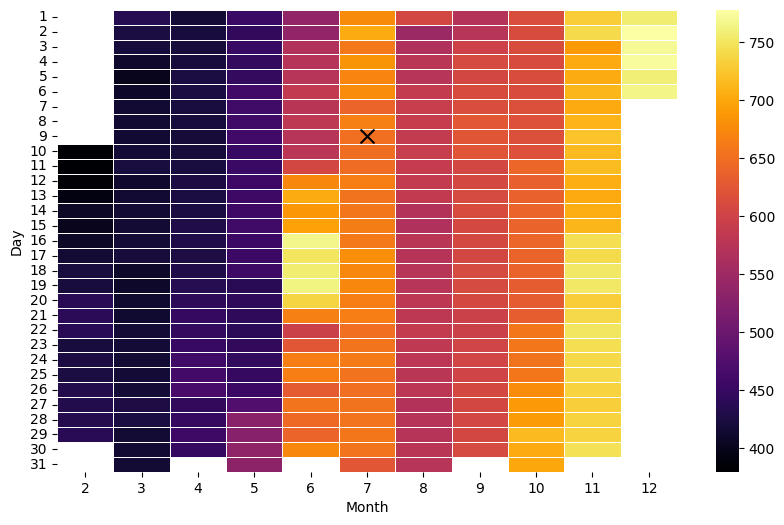

In [24]:
# Heatmap segundo evento halving
fch_hanving = datetime.strptime("2016-07-09", "%Y-%m-%d")
fch_halving_menos150 = datetime.strptime("2016-2-10", "%Y-%m-%d")
fch_halving_mas150 = datetime.strptime("2016-12-06", "%Y-%m-%d")

# Creo una copia del dataframe entre entre las fechas +/- 150 dias 
df_halving = df[
    (df['Date'] >= fch_halving_menos150)
    &
    (df['Date'] <= fch_halving_mas150)
]

# Creamos dos columnas adicionales, una para el dia y otra para el mes
df_halving['Day'] = df_halving['Date'].dt.day
df_halving['Month'] = df_halving['Date'].dt.month

# Creamos una tabla pivot para representar el heatmap
df_pivoted = df_halving.pivot(index='Day', columns='Month', values='Close')

# Defino el lienzo y creo un heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(df_pivoted, linewidths=0.5, cmap = 'inferno')

# Dibujo una X en el heatmap especificando la fecha del halving
plt.scatter(5.5, 8.5, marker='x', color='black', s=100)


id_pico_max_btc = df_halving['High'].idxmax()
fch_max_btc = df_halving.loc[id_pico_max_btc, 'Date']

print("")
print(f"El valor máximo de cierre para la cotización de BTC para el segundo período halving fue el: {fch_max_btc} cuyo valor maximo fue de {df_halving['Close'].max()}")
print(f"Dicho máximo ocurrió {(fch_max_btc - fch_hanving).days} días desde el evento halving")
print("")

🤓 Se observa que a medida que el evento halving se aproxima los valores de cierre de BTC comienzan a incrementarse alcanzando picos máximos de cotización cercanos a los 150 días posteriores al evento.

C:\Users\marti\AppData\Local\Temp\ipykernel_14720\2215777048.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_halving['Day'] = df_halving['Date'].dt.day
C:\Users\marti\AppData\Local\Temp\ipykernel_14720\2215777048.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_halving['Month'] = df_halving['Date'].dt.month



El valor máximo de cierre para la cotización de BTC para el segundo período halving fue el: 2020-08-17 00:00:00 cuyo valor maximo fue de 12254.402344
Dicho máximo ocurrió 98 días desde el evento halving



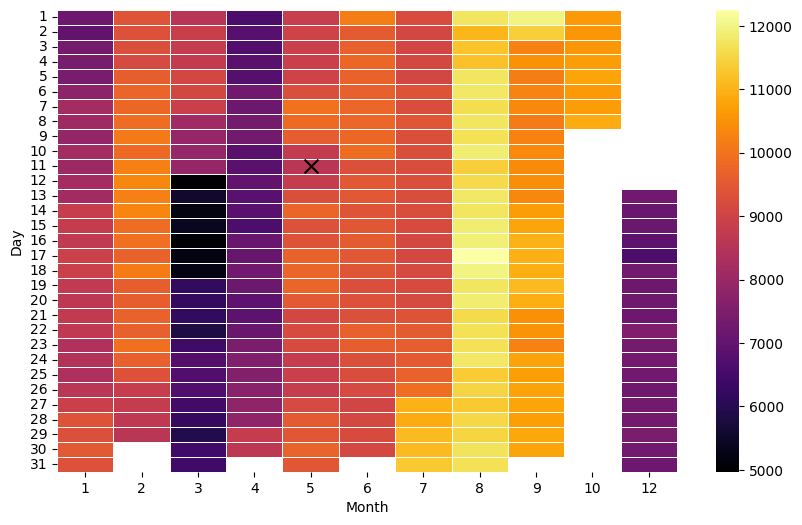

In [25]:
# Heatmap tercer evento halving
fch_hanving = datetime.strptime("2020-05-11", "%Y-%m-%d")
fch_halving_menos150 = datetime.strptime("2019-12-13", "%Y-%m-%d")
fch_halving_mas150 = datetime.strptime("2020-10-08", "%Y-%m-%d")

# Creo una copia del dataframe entre entre las fechas +/- 150 dias 
df_halving = df[
    (df['Date'] >= fch_halving_menos150)
    &
    (df['Date'] <= fch_halving_mas150)
]

# Creamos dos columnas adicionales, una para el dia y otra para el mes
df_halving['Day'] = df_halving['Date'].dt.day
df_halving['Month'] = df_halving['Date'].dt.month

# Creamos una tabla pivot para representar el heatmap
df_pivoted = df_halving.pivot(index='Day', columns='Month', values='Close')

# Defino el lienzo y creo un heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(df_pivoted, linewidths=0.5, cmap = 'inferno')

# Dibujo una X en el heatmap especificando la fecha del halving
plt.scatter(4.5, 10.5, marker='x', color='black', s=100)



id_pico_max_btc = df_halving['High'].idxmax()
fch_max_btc = df_halving.loc[id_pico_max_btc, 'Date']

print("")
print(f"El valor máximo de cierre para la cotización de BTC para el segundo período halving fue el: {fch_max_btc} cuyo valor maximo fue de {df_halving['Close'].max()}")
print(f"Dicho máximo ocurrió {(fch_max_btc - fch_hanving).days} días desde el evento halving")
print("")

🤓 Se observa que a medida que el evento halving se aproxima los valores de cierre de BTC comienzan a incrementarse alcanzando picos máximos de cotización cercanos a los 90 días posteriores al evento.

C:\Users\marti\AppData\Local\Temp\ipykernel_14720\2699641129.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes['MesAño'] = df_mes['Date'].dt.month.astype(str) + '-' + df_mes['Date'].dt.year.astype(str)
C:\Users\marti\AppData\Local\Temp\ipykernel_14720\2699641129.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.catplot(x = df_mes['MesAño'], y=df_mes['Close'], data = df_mes, kind = 'box', palette = 'hls', height = 6, aspect = 3)


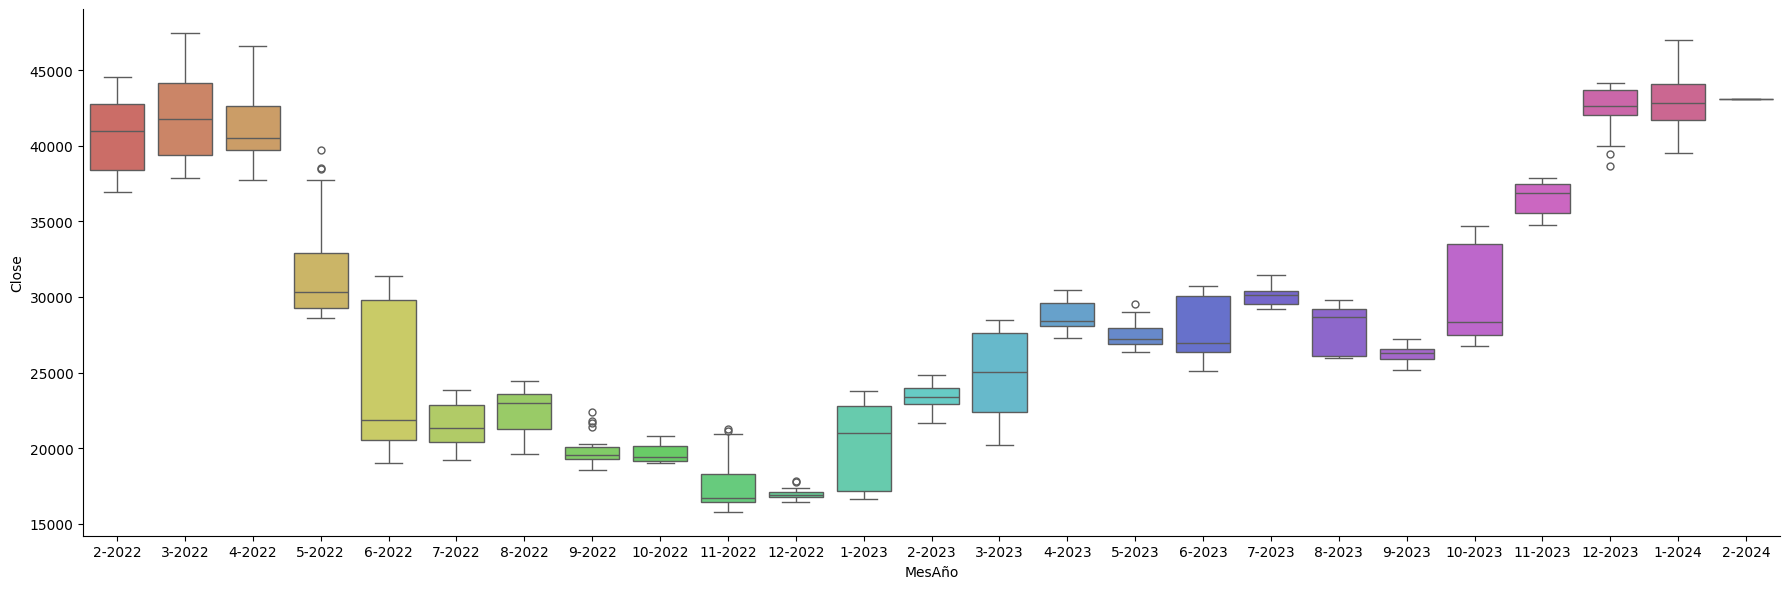

In [26]:
# Gráfica de Boxplt con el promedio de la cotizacion de cierre mes por mes de los ultimo 24 meses
fch_desde = datetime.strptime("2022-2-1", "%Y-%m-%d")
fch_hasta = datetime.strptime("2024-2-1", "%Y-%m-%d")

# Creo una copia del dataframe entre entre las fechas
df_mes = df[
    (df['Date'] >= fch_desde)
    &
    (df['Date'] <= fch_hasta)
]

# Creamos una columna con el nro de la semana a la cual corresponde
df_mes['MesAño'] = df_mes['Date'].dt.month.astype(str) + '-' + df_mes['Date'].dt.year.astype(str)

sb.catplot(x = df_mes['MesAño'], y=df_mes['Close'], data = df_mes, kind = 'box', palette = 'hls', height = 6, aspect = 3)

#ruta_excel = 'C:/Users/marti/Documents/Capacitaciones/Data Science/proyecto/result1.xlsx'
# Exportar el DataFrame a un archivo Excel
#df_semana1.to_excel(ruta_excel, index=False)


💰 Luego de 24 meses se volvieron a alcanzar los máximos de cotización.

C:\Users\marti\AppData\Local\Temp\ipykernel_14720\3904532897.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes['MesAño'] = df_mes['Date'].dt.month.astype(str) + '-' + df_mes['Date'].dt.year.astype(str)
C:\Users\marti\AppData\Local\Temp\ipykernel_14720\3904532897.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.catplot(x = df_mes['MesAño'], y=df_mes['Volume'], data = df_mes, kind = 'bar', palette = 'hls', height = 6, aspect = 3)


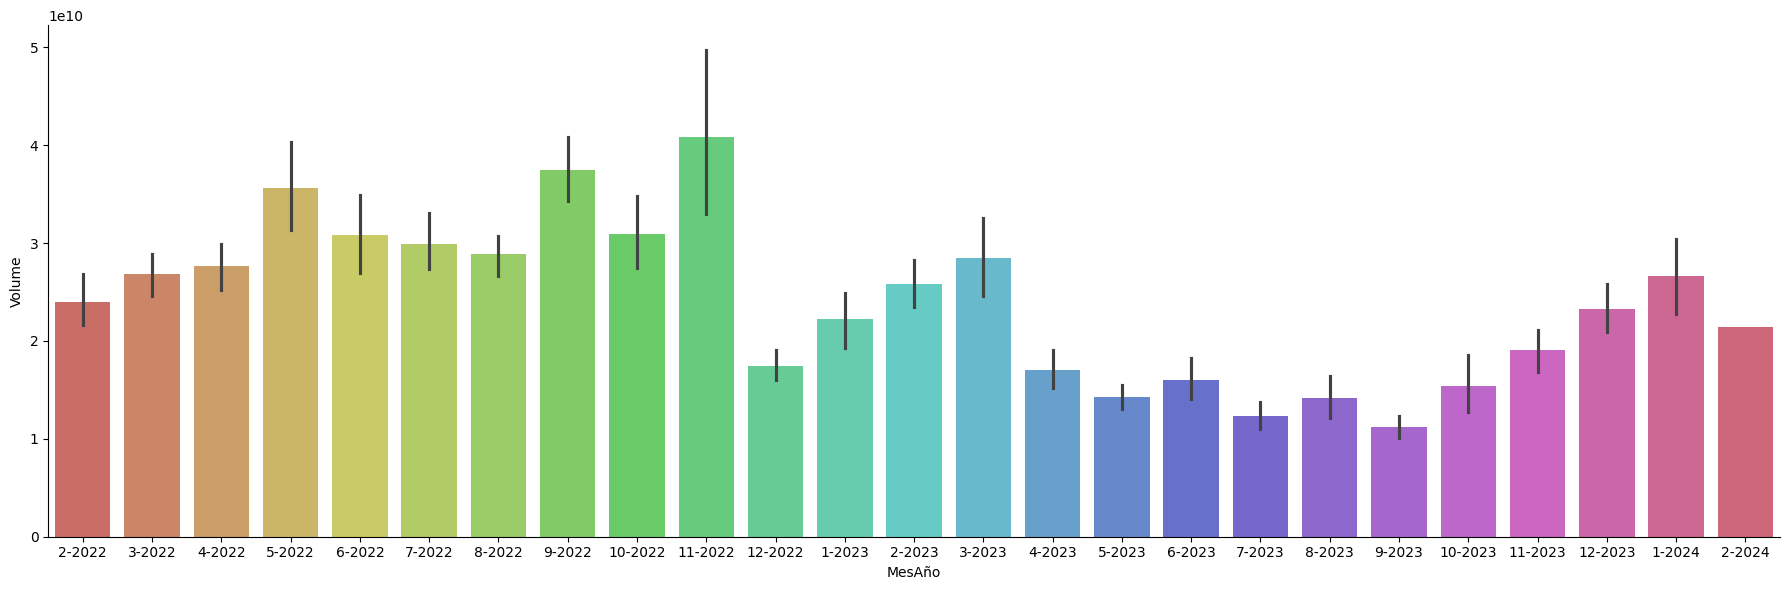

In [30]:
# Grafica de Barras con el volumen operado de los último 24 meses
fch_desde = datetime.strptime("2022-2-1", "%Y-%m-%d")
fch_hasta = datetime.strptime("2024-2-1", "%Y-%m-%d")

# Creo una copia del dataframe entre entre las fechas
df_mes = df[
    (df['Date'] >= fch_desde)
    &
    (df['Date'] <= fch_hasta)
]

# Creamos una columna con el nro de la semana a la cual corresponde
df_mes['MesAño'] = df_mes['Date'].dt.month.astype(str) + '-' + df_mes['Date'].dt.year.astype(str)

sb.catplot(x = df_mes['MesAño'], y=df_mes['Volume'], data = df_mes, kind = 'bar', palette = 'hls', height = 6, aspect = 3)

ruta_excel = 'C:/Users/marti/Documents/Capacitaciones/Data Science/proyecto/result1.xlsx'
# Exportar el DataFrame a un archivo Excel
df_mes.to_excel(ruta_excel, index=False)

C:\Users\marti\AppData\Local\Temp\ipykernel_14720\1001114883.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes['MesAño'] = df_mes['Date'].dt.month.astype(str) + '-' + df_mes['Date'].dt.year.astype(str)


Text(0, 0.5, 'Meses')

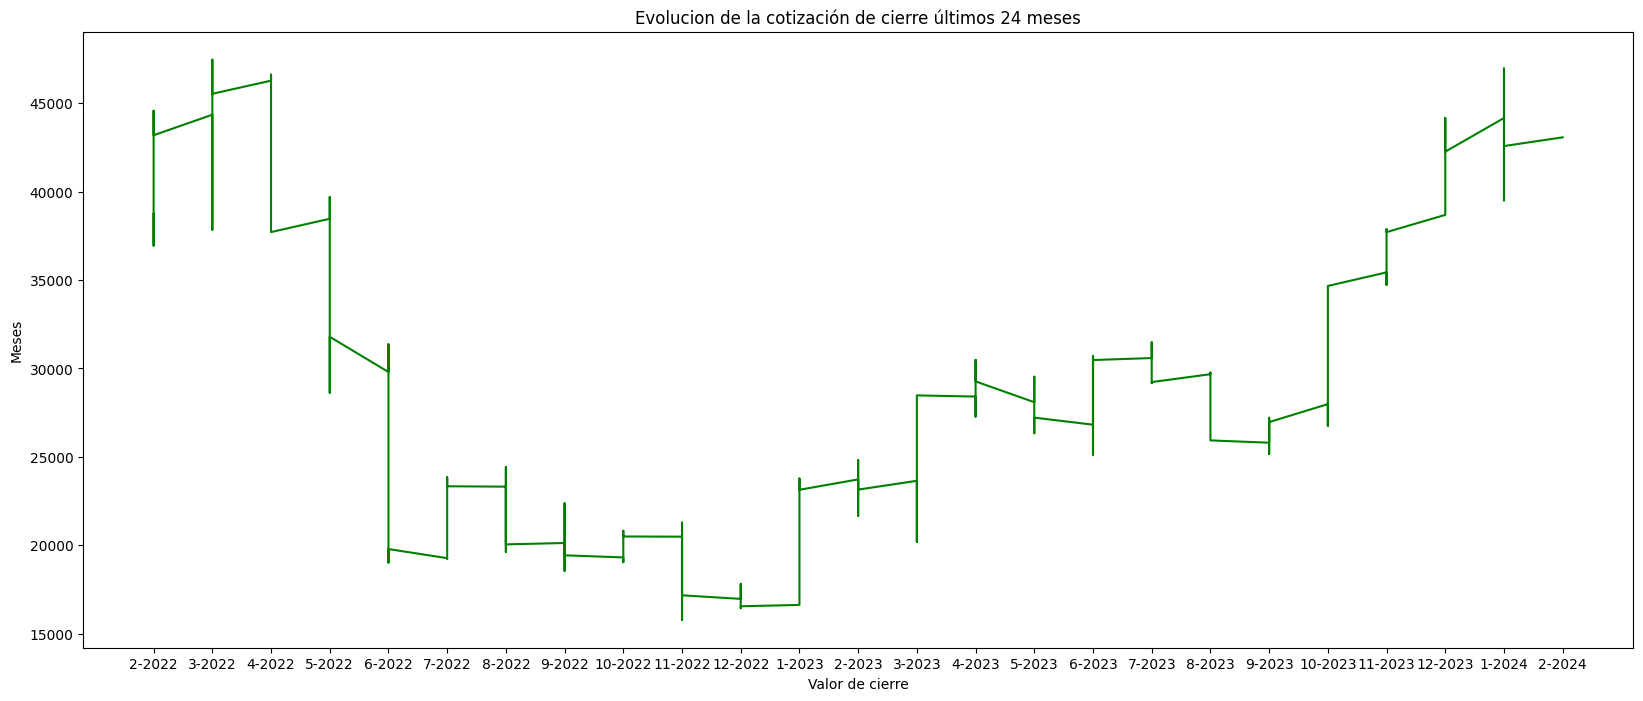

In [32]:
# Gráfica de líneas con los valores de cierre de la cotizacion mes por mes de los último 24 meses
fch_desde = datetime.strptime("2022-2-1", "%Y-%m-%d")
fch_hasta = datetime.strptime("2024-2-1", "%Y-%m-%d")

# Creo una copia del dataframe entre entre las fechas
df_mes = df[
    (df['Date'] >= fch_desde)
    &
    (df['Date'] <= fch_hasta)
]

# Creamos una columna con el nro de la semana a la cual corresponde
df_mes['MesAño'] = df_mes['Date'].dt.month.astype(str) + '-' + df_mes['Date'].dt.year.astype(str)

#sb.catplot(x = df_mes['MesAño'], y=df_mes['Volume'], data = df_mes, kind = 'bar', palette = 'hls', height = 6, aspect = 3)



plt.figure(figsize=(20, 8))
plt.plot(df_mes['MesAño'], df_mes['Close'], color="green", linestyle="solid")

# Customización del gráfico
    # Título del gráfico
plt.title("Evolucion de la cotización de cierre últimos 24 meses")
    # Personalización
plt.xlabel("Valor de cierre")
plt.ylabel("Meses")

C:\Users\marti\AppData\Local\Temp\ipykernel_14720\1194512810.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes['MesAño'] = df_mes['Date'].dt.month.astype(str) + '-' + df_mes['Date'].dt.year.astype(str)


Text(0, 0.5, 'Cierre')

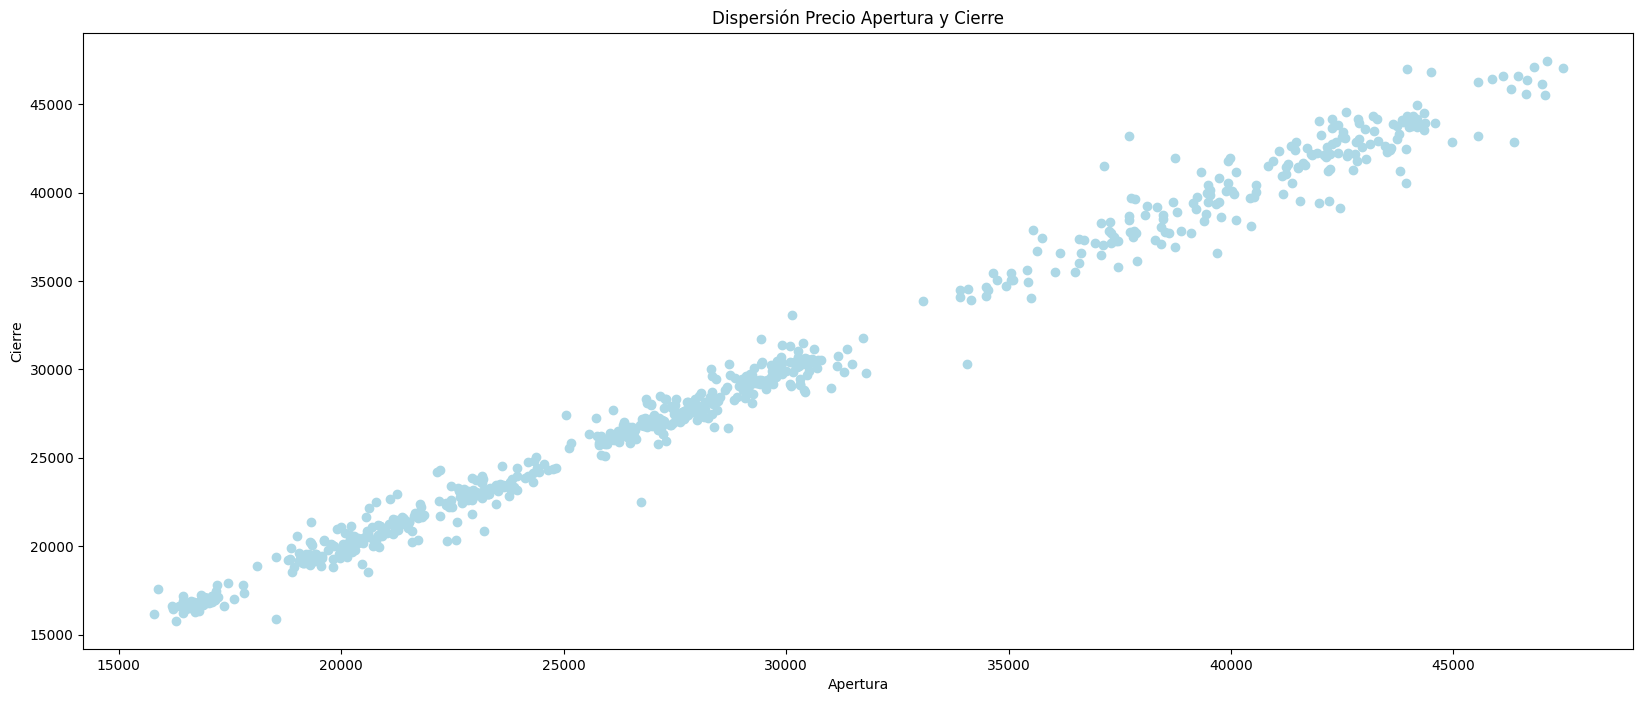

In [33]:
# Gráfica de dispersión con el promedio de la cotización de cierre mes por mes de los último 24 meses
fch_desde = datetime.strptime("2022-2-1", "%Y-%m-%d")
fch_hasta = datetime.strptime("2024-2-1", "%Y-%m-%d")

# Creo una copia del dataframe entre entre las fechas
df_mes = df[
    (df['Date'] >= fch_desde)
    &
    (df['Date'] <= fch_hasta)
]

# Creamos una columna con el nro de la semana a la cual corresponde
df_mes['MesAño'] = df_mes['Date'].dt.month.astype(str) + '-' + df_mes['Date'].dt.year.astype(str)

plt.figure(figsize=(20, 8))
plt.scatter(x=df_mes["Open"], y=df_mes["Close"], color='lightblue')

plt.title("Dispersión Precio Apertura y Cierre")
plt.xlabel("Apertura")
plt.ylabel("Cierre")

C:\Users\marti\AppData\Local\Temp\ipykernel_14720\3797564685.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes['MesAño'] = df_mes['Date'].dt.month.astype(str) + '-' + df_mes['Date'].dt.year.astype(str)


(array([0.0e+00, 2.0e+10, 4.0e+10, 6.0e+10, 8.0e+10, 1.0e+11, 1.2e+11,
        1.4e+11]),
 [Text(0, 0.0, '0.0'),
  Text(0, 20000000000.0, '0.2'),
  Text(0, 40000000000.0, '0.4'),
  Text(0, 60000000000.0, '0.6'),
  Text(0, 80000000000.0, '0.8'),
  Text(0, 100000000000.0, '1.0'),
  Text(0, 120000000000.0, '1.2'),
  Text(0, 140000000000.0, '1.4')])

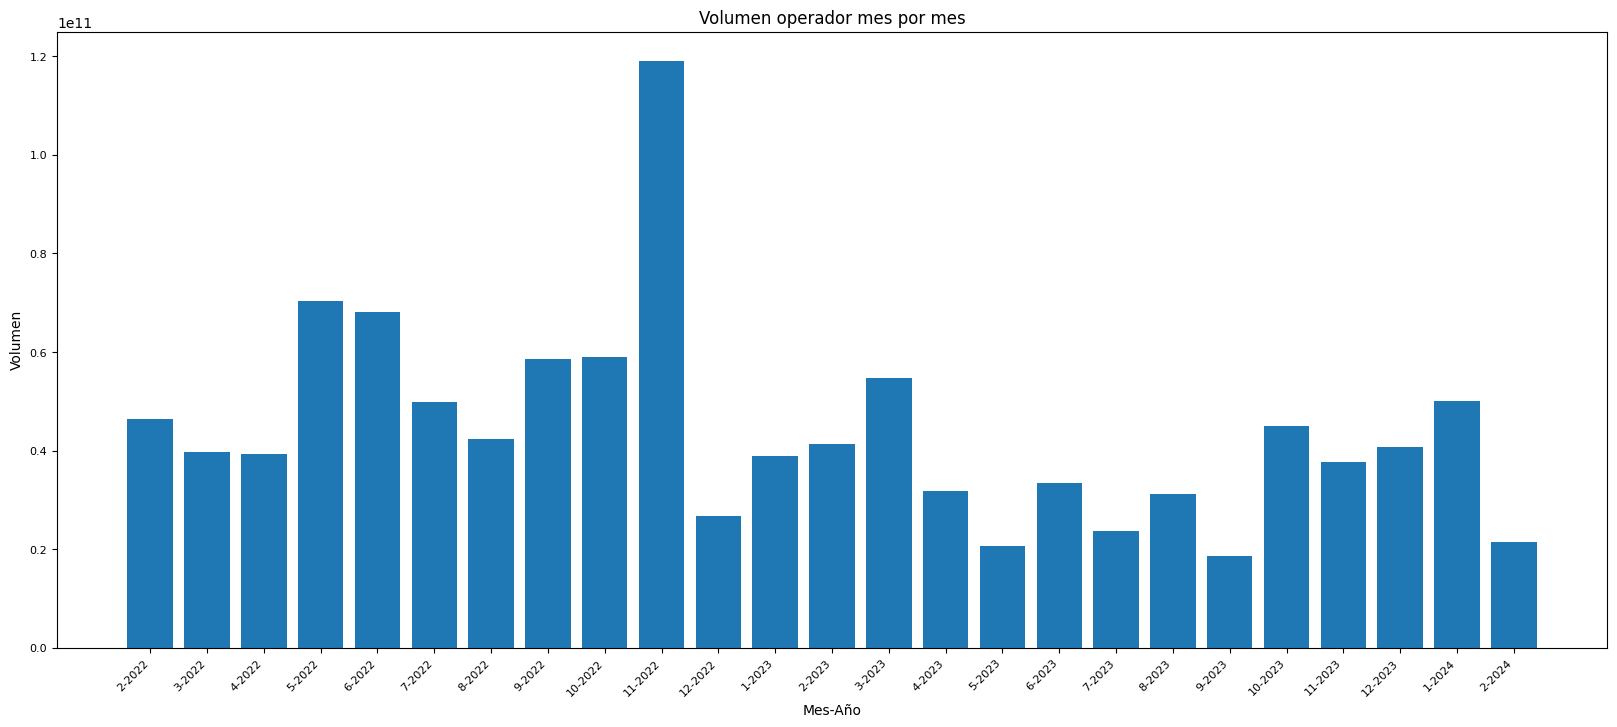

In [35]:
# Grafica de Barras con el promedio de la cotizacion de cierre mes por mes de los ultimo 24 meses
fch_desde = datetime.strptime("2022-2-1", "%Y-%m-%d")
fch_hasta = datetime.strptime("2024-2-1", "%Y-%m-%d")

# Creo una copia del dataframe entre entre las fechas
df_mes = df[
    (df['Date'] >= fch_desde)
    &
    (df['Date'] <= fch_hasta)
]

# Creamos una columna con el nro de la semana a la cual corresponde
df_mes['MesAño'] = df_mes['Date'].dt.month.astype(str) + '-' + df_mes['Date'].dt.year.astype(str)


plt.figure(figsize=(20, 8))
plt.bar(df_mes['MesAño'], df_mes['Volume'])
# Customización del gráfico
    # Título del gráfico
plt.title("Volumen operador mes por mes")
    # Título para el eje y
plt.ylabel("Volumen")
    # Título para el eje x
plt.xlabel("Mes-Año")
    # Ajusto las etiquetas del eje x
plt.xticks(rotation=45, ha="right", fontsize=8)
    # Ajusto las etiquetas del eje y
plt.yticks(fontsize=8)

### 2- Entrenamiento del modelo

....................

### 3- Validación del modelo

.......................

### 4- Sintonía fina, calibración y ajustes

.........................

### 5- Conclusiones finales

..........................